In [2]:
import numpy as np
import pandas as pd
import json
import os

full = pd.read_csv("Full/full_3.csv", index_col=0)
full_err_df = pd.read_csv("Full/full_err.csv", index_col=0)

/tmp/ipykernel_656164/4257489344.py:6: DtypeWarning: Columns (58,76,78,100,153) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv("Full/full_3.csv", index_col=0)


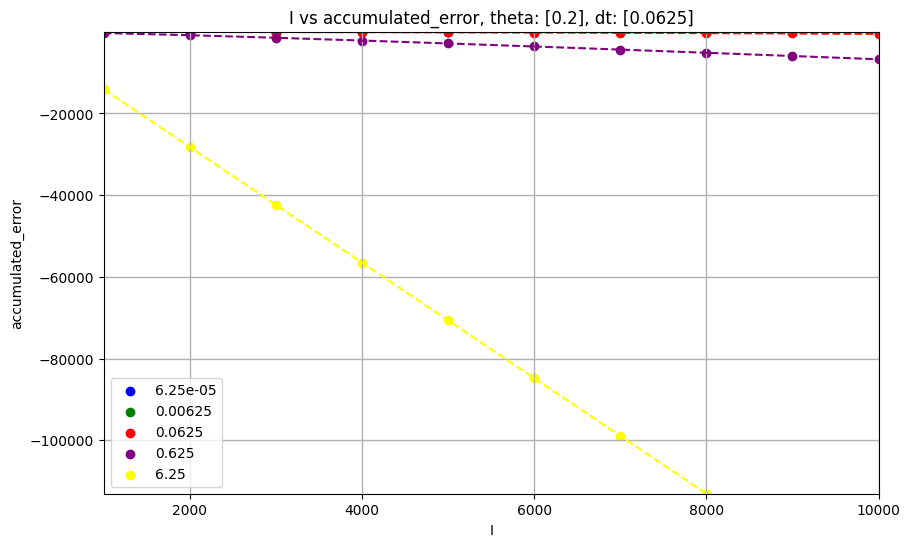

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

interval = 1000  # Define the interval for I
sampled_err_df = full_err_df[full_err_df['I'] % interval == 0]  # Sample rows where I is a multiple of the interval\
df = sampled_err_df

src = 'I'
target = 'accumulated_error'

# Define the filter criteria
filter_criteria = {
    'theta': [0.2],
    'N': [1000000],
    # 'dt': [0.00625,]
    # 'I': [10000],
}

# Apply filtering based on the filter criteria
for feature, values in filter_criteria.items():
    df = df[df[feature].isin(values)]

# Group by a specific feature
grouped = df.groupby('dt')

# Plot X vs y for each group in the histogram
colors = ['blue', 'green', 'red', 'purple','yellow']  # Specify colors for each group if known

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot X vs y with scatter points and connect them with dashed lines for each group
for (group_name, group_data), color in zip(grouped, colors):
    ax.scatter(group_data[src], group_data[target], color=color, label=f'{group_name}')
    ax.plot(group_data[src], group_data[target], linestyle='--', color=color)  # Dashed line

# Add grid and logarithmic scales
ax.grid(linestyle='-', linewidth=1)
# ax.set_yscale("asinh")         # Logarithmic scale for y-axis
# ax.set_xscale('symlog')      # Symmetric log scale for x-axis
# 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'
# Add labels, title, and legend
ax.set_xlabel(src)
ax.set_ylabel(target)
ax.set_title('I vs accumulated_error, theta: [0.2], dt: [0.0625]')
ax.legend()

# Set x and y limits to cover the range of points
ax.set_xlim(df[src].min() - 1, df['I'].max() + 1)
ax.set_ylim(df[target].min() * 0.8, df[target].max() * 1.2)


plt.show()


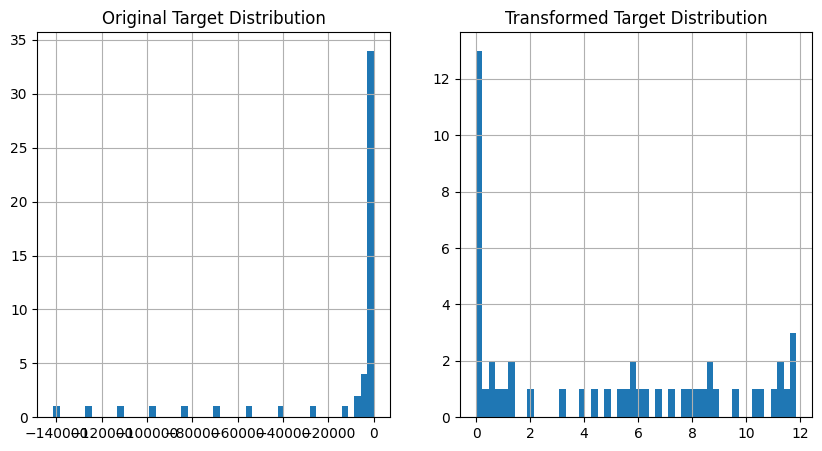

In [4]:
# Log transformation (ensure values are positive)
df['transformed_error'] = np.log(-df['accumulated_error'] + df['accumulated_error'].max() + 1)

# Plot original vs. transformed
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['accumulated_error'].hist(bins=50)
plt.title("Original Target Distribution")

plt.subplot(1, 2, 2)
df['transformed_error'].hist(bins=50)
plt.title("Transformed Target Distribution")
plt.show()


In [25]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 9.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 3.8 MB/s eta 0:00:0000:0100:02


In [53]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Features and target
X = df[['N', 'theta', 'dt', 'I']]
y = df['transformed_error']  # Use transformed target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: XGBoost

model = XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.1, max_depth=6)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Transformed): {mae:.6f}")
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Error (Transformed): {mape:.6f}")


Mean Absolute Error (Transformed): 0.067266
Mean Absolute Error (Transformed): 0.085531


In [22]:
df['accumulated_error'].describe()

count     200.000000
mean     -393.613661
std       821.743518
min     -5537.900178
25%      -369.372935
50%       -41.582922
75%        -3.048499
max        -0.026467
Name: accumulated_error, dtype: float64

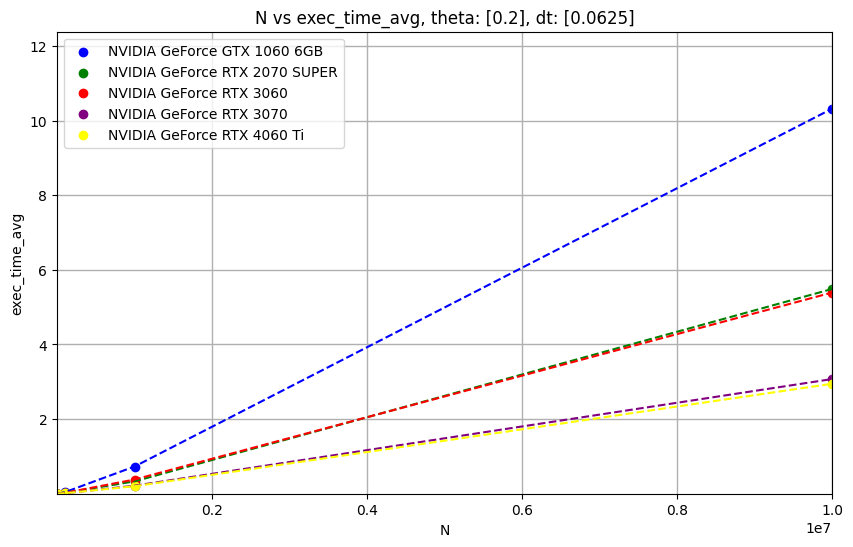

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = full

# Define the filter criteria
filter_criteria = {
    'theta': [0.2],
    'dt': [0.0625]
}

# Apply filtering based on the filter criteria
for feature, values in filter_criteria.items():
    df = df[df[feature].isin(values)]

# Group by a specific feature
grouped = df.groupby('Name')

# Plot X vs y for each group in the histogram
colors = ['blue', 'green', 'red', 'purple','yellow']  # Specify colors for each group if known

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot X vs y with scatter points and connect them with dashed lines for each group
for (group_name, group_data), color in zip(grouped, colors):
    ax.scatter(group_data['N'], group_data['exec_time_avg'], color=color, label=f'{group_name}')
    ax.plot(group_data['N'], group_data['exec_time_avg'], linestyle='--', color=color)  # Dashed line

# Add grid and logarithmic scales
ax.grid(linestyle='-', linewidth=1)
# ax.set_yscale('log')         # Logarithmic scale for y-axis
# ax.set_xscale('symlog')      # Symmetric log scale for x-axis

# Add labels, title, and legend
ax.set_xlabel('N')
ax.set_ylabel('exec_time_avg')
ax.set_title('N vs exec_time_avg, theta: [0.2], dt: [0.0625]')
ax.legend()

# Set x and y limits to cover the range of points
ax.set_xlim(df['N'].min() - 1, df['N'].max() + 1)
ax.set_ylim(df['exec_time_avg'].min() * 0.8, df['exec_time_avg'].max() * 1.2)

plt.show()

### transform tests

ValueError: Expected 2D array, got 1D array instead:
array=[1.5356330e-03 1.7987950e-03 4.8471350e-03 4.0545180e-02 7.2996780e-01
 1.0318240e+01 9.9821130e-04 1.1739730e-03 3.2964710e-03 1.4810440e-02
 2.1558610e-01 3.0734820e+00 1.0963677e-03 1.4354960e-03 4.2229370e-03
 2.4073860e-02 3.8075950e-01 5.3918220e+00 1.2518650e-03 1.5475270e-03
 4.8706030e-03 2.5545450e-02 3.3155690e-01 5.4869650e+00 1.5930420e-03
 1.6407980e-03 3.3554790e-03 1.4098920e-02 2.0143910e-01 2.9472490e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

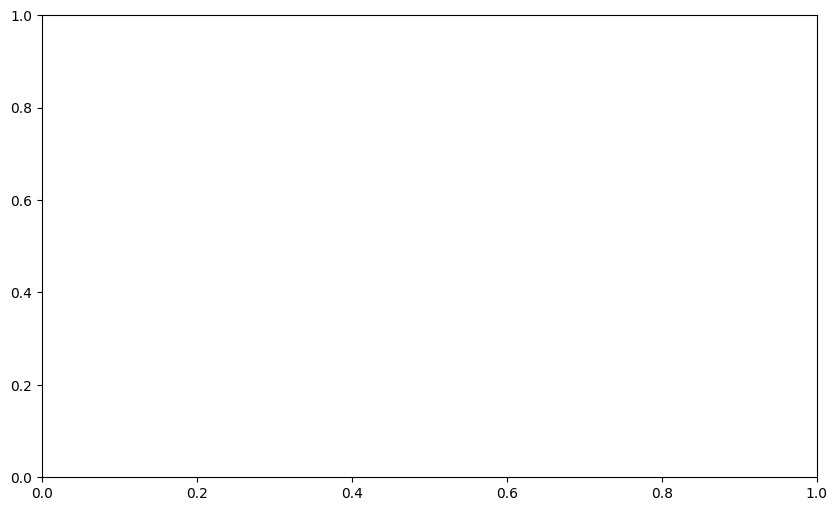

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = full

# Define the filter criteria
filter_criteria = {
    # 'N': [100,1000,10000],
    'theta': [0.2],
    'dt': [0.0625]
}

# Apply filtering based on the filter criteria
for feature, values in filter_criteria.items():
    df = df[df[feature].isin(values)]

# Group by a specific feature
grouped = df.groupby('Name')

# Plot X vs y for each group in the histogram
colors = ['blue', 'green', 'red', 'purple','yellow']  # Specify colors for each group if known

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

import numpy as np
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
# transformer = FunctionTransformer(np.sqrt)
transformer = PowerTransformer()
transformer.fit(df['exec_time_avg'].to_numpy())

# Plot X vs y with scatter points and connect them with dashed lines for each group
for (group_name, group_data), color in zip(grouped, colors):
    gd = transformer.transform(group_data['exec_time_avg'])
    gd = transformer.transform(group_data['exec_time_avg'])
    ax.scatter(group_data['N'], gd, color=color, label=f'{group_name}')
    ax.plot(group_data['N'], gd, linestyle='--', color=color)  # Dashed line

# Add grid and logarithmic scales
ax.grid(linestyle='-', linewidth=1)
# ax.set_yscale('log')         # Logarithmic scale for y-axis
ax.set_xscale('symlog')      # Symmetric log scale for x-axis

# Add labels, title, and legend
ax.set_xlabel('N')
ax.set_ylabel('exec_time_avg')
ax.set_title('N vs exec_time_avg, theta: [0.2], dt: [0.0625]')
ax.legend()

# Set x and y limits to cover the range of points
ax.set_xlim(df['N'].min() - 1, df['N'].max() + 1)
# ax.set_ylim(df['exec_time_avg'].min() * 0.8, df['exec_time_avg'].max() * 1.2)


plt.show()


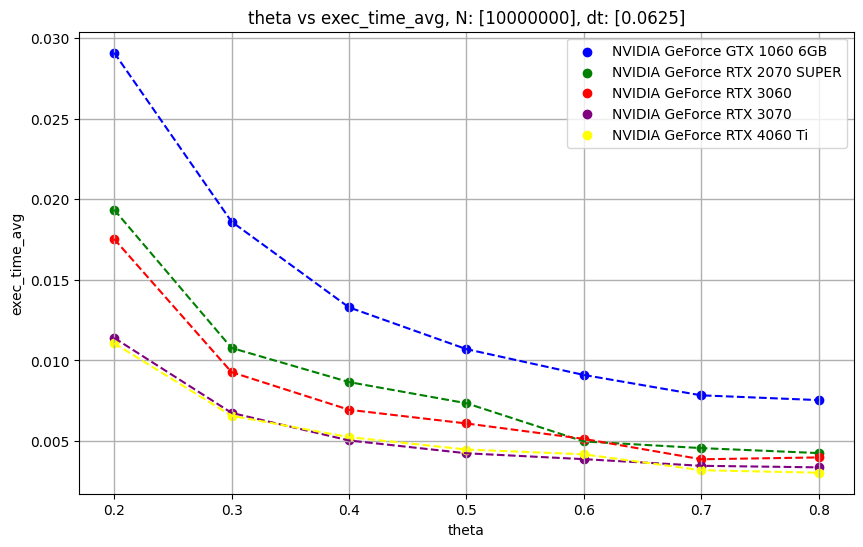

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = full

src = 'theta'
target = 'exec_time_avg'

# Define the filter criteria
filter_criteria = {
    'N': [100000],
    'dt': [62500]
}

# Apply filtering based on the filter criteria
for feature, values in filter_criteria.items():
    df = df[df[feature].isin(values)]

# Group by a specific feature
grouped = df.groupby('Name')

# Plot X vs y for each group in the histogram
colors = ['blue', 'green', 'red', 'purple','yellow']  # Specify colors for each group if known

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot X vs y with scatter points and connect them with dashed lines for each group
for (group_name, group_data), color in zip(grouped, colors):
    ax.scatter(group_data[src], group_data[target], color=color, label=f'{group_name}')
    ax.plot(group_data[src], group_data[target], linestyle='--', color=color)  # Dashed line

# Add grid and logarithmic scales
ax.grid(linestyle='-', linewidth=1)
# ax.set_yscale('log')         # Logarithmic scale for y-axis
# ax.set_xscale('symlog')      # Symmetric log scale for x-axis

# Add labels, title, and legend
ax.set_xlabel(src)
ax.set_ylabel(target)
ax.set_title('theta vs exec_time_avg, N: [10000000], dt: [0.0625]')
ax.legend()

# Set x and y limits to cover the range of points
# ax.set_xlim(df[src].min() - 1, df[src].max() + 1)
# ax.set_ylim(df[target].min() * 0.8, df[target].max() * 1.2)


plt.show()


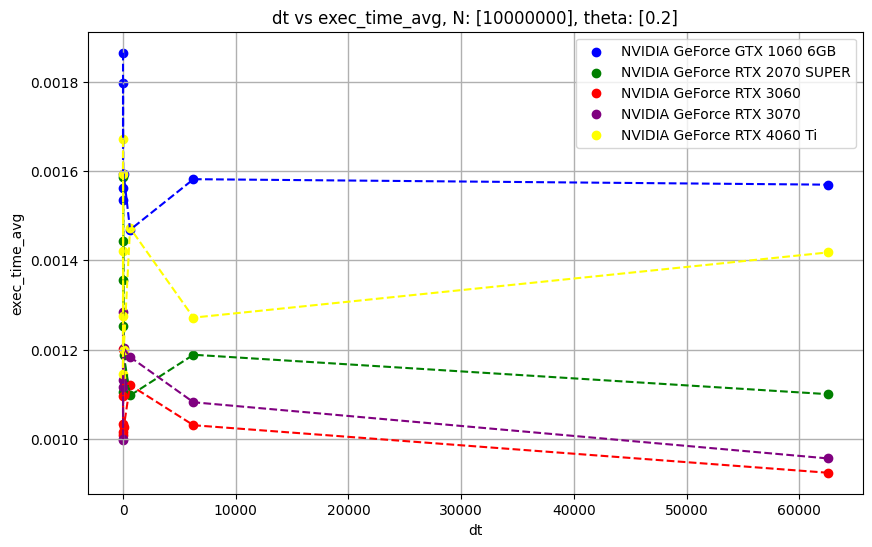

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = full

src = 'dt'
target = 'exec_time_avg'

# Define the filter criteria
filter_criteria = {
    'N': [100],
    'theta': [0.2],
    'dt': [0.000625,0.00625,0.0625,0.625,6.25,62.5,625,6250,62500]
}

# Apply filtering based on the filter criteria
for feature, values in filter_criteria.items():
    df = df[df[feature].isin(values)]

# Group by a specific feature
grouped = df.groupby('Name')

# Plot X vs y for each group in the histogram
colors = ['blue', 'green', 'red', 'purple','yellow']  # Specify colors for each group if known

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot X vs y with scatter points and connect them with dashed lines for each group
for (group_name, group_data), color in zip(grouped, colors):
    ax.scatter(group_data[src], group_data[target], color=color, label=f'{group_name}')
    ax.plot(group_data[src], group_data[target], linestyle='--', color=color)  # Dashed line

# Add grid and logarithmic scales
ax.grid(linestyle='-', linewidth=1)
# ax.set_yscale('log')         # Logarithmic scale for y-axis
# ax.set_xscale('symlog')      # Symmetric log scale for x-axis

# Add labels, title, and legend
ax.set_xlabel(src)
ax.set_ylabel(target)
ax.set_title('dt vs exec_time_avg, N: [10000000], theta: [0.2]')
ax.legend()

# Set x and y limits to cover the range of points
# ax.set_xlim(df[src].min() - 1, df[src].max() + 1)
# ax.set_ylim(df[target].min() * 0.8, df[target].max() * 1.2)


plt.show()


In [23]:
df

,N,theta,dt,I,exec_time_min,exec_time_max,exec_time_avg,profiling,Name,Compute Capability,...,ipc (predict_particles),issued_ipc (predict_particles),issue_slot_utilization (predict_particles),eligible_warps_per_cycle (predict_particles),dram_read_transactions (predict_particles),dram_write_transactions (predict_particles),dram_read_throughput (predict_particles),dram_write_throughput (predict_particles),dram_read_bytes (predict_particles),dram_write_bytes (predict_particles)
351,10000000,0.2,0.000625,2,10.26750,10.36180,10.300840,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.152697,0.152726,3.593771,0.151046,17577636.0,10003069.0,9.554344e+01,5.437180e+01,562484352.0,320098208.0
352,10000000,0.2,0.006250,2,10.25690,10.34960,10.308470,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.152771,0.152800,3.595522,0.149489,17528066.0,10010290.0,9.522682e+01,5.438410e+01,560898112.0,320329280.0
353,10000000,0.2,0.062500,2,10.24620,10.38550,10.318240,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.151752,0.152464,3.587612,0.150302,17702690.0,9996015.0,9.610132e+01,5.426465e+01,566486080.0,319872480.0
354,10000000,0.2,0.625000,2,10.11700,10.24780,10.200500,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.152356,0.152386,3.585776,0.148787,17695799.0,10000660.0,9.600325e+01,5.425558e+01,566265568.0,320021120.0
355,10000000,0.2,6.250000,2,5.97885,6.02583,6.009068,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.152372,0.152401,3.586128,0.148554,17699748.0,9995344.0,9.616809e+01,5.430773e+01,566391936.0,319851008.0
356,10000000,0.2,62.500000,2,5.06412,5.12860,5.108315,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.152034,0.152396,3.585995,0.148613,17551351.0,9988494.0,9.529325e+01,5.423150e+01,561643232.0,319631808.0
357,10000000,0.2,625.000000,2,4.92903,4.99265,4.959520,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.152978,0.153007,3.600375,0.149584,17695459.0,9999885.0,9.611748e+01,5.431697e+01,566254688.0,319996320.0
358,10000000,0.2,6250.000000,2,4.91582,4.97523,4.943176,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.151678,0.151088,3.555224,0.148834,17574230.0,9995823.0,9.544680e+01,5.428797e+01,562375360.0,319866336.0
359,10000000,0.2,62500.000000,2,4.81354,4.98225,4.932068,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.150915,0.152126,3.579651,0.149764,17693301.0,9993992.0,9.612204e+01,5.429416e+01,566185632.0,319807744.0
771,10000000,0.2,0.000625,2,3.04632,3.07956,3.067877,True,NVIDIA GeForce RTX 3070,8.6,...,0.020000,0.020000,2.150000,5.340000,17506036.0,10032244.0,2.581250e+11,1.479246e+11,560193152.0,321031808.0


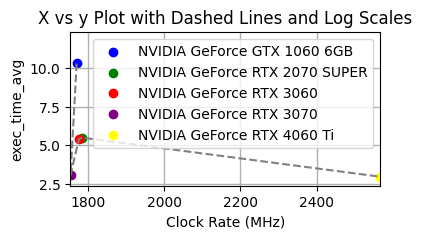

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

df = full

src = 'Clock Rate (MHz)'
target = 'exec_time_avg'

# Define the filter criteria
filter_criteria = {
    'N': [10000000],
    'theta': [0.2],
    'dt': [0.0625]
}

# Apply filtering based on the filter criteria
for feature, values in filter_criteria.items():
    df = df[df[feature].isin(values)]


# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 2))

# Group by a specific feature
grouped = df.groupby('Name')
# Plot X vs y for each group in the histogram
colors = ['blue', 'green', 'red', 'purple','yellow']  # Specify colors for each group if known
for (group_name, group_data), color in zip(grouped, colors):
    ax.scatter(group_data[src], group_data[target], color=color, label=f'{group_name}')

# Plot all the data with points connected by dashed lines
# ax.scatter(df[src], df[target], color='blue', label='Data Points')
ax.plot(df[src], df[target], linestyle='--', color='gray')  # Dashed line

# Add grid and logarithmic scales
ax.grid(linestyle='-', linewidth=1)
# ax.set_yscale('log')         # Logarithmic scale for y-axis
# ax.set_xscale('symlog')      # Symmetric log scale for x-axis

# Set x and y limits to cover the range of points
ax.set_xlim(df[src].min() - 1, df[src].max() + 1)
ax.set_ylim(df[target].min() * 0.8, df[target].max() * 1.2)

# Add labels, title, and legend
ax.set_xlabel(src)
ax.set_ylabel(target)
ax.set_title('X vs y Plot with Dashed Lines and Log Scales')
ax.legend()

plt.show()



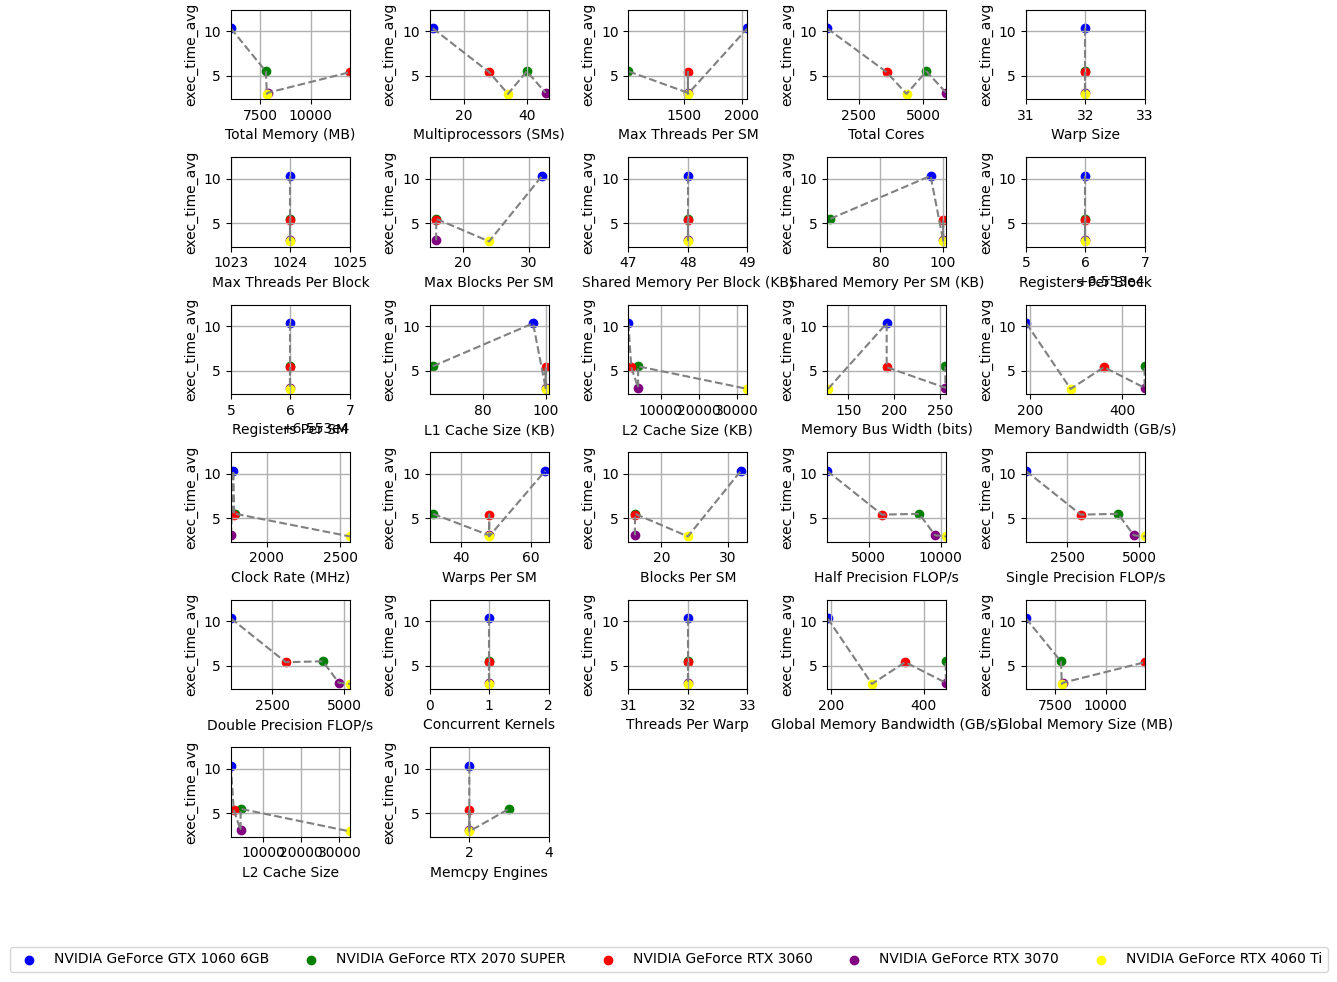

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

df = full

# Define the source features and target
src_list = [
    "Total Memory (MB)", "Multiprocessors (SMs)", "Max Threads Per SM", 
    "Total Cores", "Warp Size", "Max Threads Per Block", "Max Blocks Per SM", 
    "Shared Memory Per Block (KB)", "Shared Memory Per SM (KB)", 
    "Registers Per Block", "Registers Per SM", "L1 Cache Size (KB)", 
    "L2 Cache Size (KB)", "Memory Bus Width (bits)", "Memory Bandwidth (GB/s)", 
    "Clock Rate (MHz)", "Warps Per SM", "Blocks Per SM", 
    "Half Precision FLOP/s", "Single Precision FLOP/s", "Double Precision FLOP/s", 
    "Concurrent Kernels", "Threads Per Warp", "Global Memory Bandwidth (GB/s)", 
    "Global Memory Size (MB)", "L2 Cache Size", "Memcpy Engines"
]
target = 'exec_time_avg'

# Define the filter criteria
filter_criteria = {
    'N': [10000000],
    'theta': [0.2],
    'dt': [0.0625]
}

# Apply filtering based on the filter criteria
for feature, values in filter_criteria.items():
    df = df[df[feature].isin(values)]

# Number of plots in the grid (based on number of source features)
n_cols = 5  # Adjusted to 4 columns to fit more plots in a row
n_rows = (len(src_list) + n_cols - 1) // n_cols  # Calculate rows needed

# Create a figure and axes with tighter layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 1.5 * n_rows))
axes = axes.flatten()  # Flatten axes array for easier indexing

# Place the legend outside the grid and only show it once

# Plot X vs y for each source feature
for i, src in enumerate(src_list):
    ax = axes[i]
    ax.grid(linestyle='-', linewidth=1)

    # Sort data by the source feature before plotting
    sorted_df = df.sort_values(by=src)

    # Group by 'Name' to have different colors for different groups
    grouped = sorted_df.groupby('Name')
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Adjust color list as needed
    for (group_name, group_data), color in zip(grouped, colors):
        ax.scatter(group_data[src], group_data[target], color=color)

    # Plot all the data with points connected by dashed lines
    ax.plot(sorted_df[src], sorted_df[target], linestyle='--', color='gray')  # Dashed line

    # Set the x and y axis limits to cover the range of points
    ax.set_xlim(sorted_df[src].min() - 1, sorted_df[src].max() + 1)
    ax.set_ylim(sorted_df[target].min() * 0.8, sorted_df[target].max() * 1.2)

    # Set the x and y labels
    ax.set_xlabel(src)
    ax.set_ylabel(target)
    # ax.set_title(f'{src} vs {target}')

fig.legend(labels=[group_name for group_name, _ in grouped], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

# Remove any empty subplots if the number of src features is not a multiple of n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Tight layout to make sure everything fits
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Data for the table
data = {
    'GPU': [
        'RTX 4060 Ti',
        'RTX 3070',
        'RTX 3060',
        'RTX 2070 SUPER',
        'GTX 1060 6GB',
        'Mean CV MAPE',
        'Validation MAPE'
    ],
    'RF': [0.1906, 0.2277, 0.2205, 0.2403, 0.3426, 0.2443, 0.2069],
    'ERT': [0.1985, 0.3070, 0.3296, 0.2104, 0.3622, 0.2815, 0.2061],
    'SVM': [0.4727, 0.4739, 0.4656, 0.3586, 0.3760, 0.4294, 0.3610]
}

# Create DataFrame
df = pd.DataFrame(data)

# Multiply by 100 and round to 2 decimals
df[['RF','ERT','SVM']] = df[['RF', 'ERT', 'SVM']].apply(lambda x: (x * 100).round(2))
df[['RF','ERT','SVM']] = df[['RF', 'ERT', 'SVM']].round(2)


# Display updated DataFrame in LaTeX format with full horizontal and vertical lines
latex_output_with_lines = df.to_latex(index=False, caption="MAPE Comparison across Models and GPUs (Percentage)", label="tab:mape_models_percentage", 
                                      column_format="|l|r|r|r|", header=True)

print(latex_output_with_lines)

\begin{table}
\caption{MAPE Comparison across Models and GPUs (Percentage)}
\label{tab:mape_models_percentage}
\begin{tabular}{|l|r|r|r|}
\toprule
GPU & RF & ERT & SVM \\
\midrule
RTX 4060 Ti & 19.060000 & 19.850000 & 47.270000 \\
RTX 3070 & 22.770000 & 30.700000 & 47.390000 \\
RTX 3060 & 22.050000 & 32.960000 & 46.560000 \\
RTX 2070 SUPER & 24.030000 & 21.040000 & 35.860000 \\
GTX 1060 6GB & 34.260000 & 36.220000 & 37.600000 \\
Mean CV MAPE & 24.430000 & 28.150000 & 42.940000 \\
Validation MAPE & 20.690000 & 20.610000 & 36.100000 \\
\bottomrule
\end{tabular}
\end{table}



In [16]:
latex_table = full[['Name','Compute Capability','Global Memory Size (MB)', 'Clock Rate (MHz)','L2 Cache Size (KB)',"Multiprocessors (SMs)","Total Cores"]].drop_duplicates().to_csv(index=None)

In [17]:

print(latex_table)

Name,Compute Capability,Global Memory Size (MB),Clock Rate (MHz),L2 Cache Size (KB),Multiprocessors (SMs),Total Cores
NVIDIA GeForce GTX 1060 6GB,6.1,6065,1771,1536,10,1280
NVIDIA GeForce RTX 3070,8.6,7877,1755,4096,46,5888
NVIDIA GeForce RTX 3060,8.6,11939,1777,2304,28,3584
NVIDIA GeForce RTX 2070 SUPER,7.5,7790,1785,4096,40,5120
NVIDIA GeForce RTX 4060 Ti,8.9,7843,2565,32768,34,4352



## FROM MODELS OUTPUTS

## Output results for latex

### input+gpu

In [ ]:
import pandas as pd

# Data for the table
data = {
    'GPU': [
        'RTX 4060 Ti',
        'RTX 3070',
        'RTX 3060',
        'RTX 2070 SUPER',
        'GTX 1060 6GB',
        'Mean CV MAPE',
        'Validation MAPE'
    ],
    'RF': [0.1906, 0.2277, 0.2205, 0.2403, 0.3426, 0.2443, 0.2069],
    'ERT': [0.1985, 0.3070, 0.3296, 0.2104, 0.3622, 0.2815, 0.2061],
    'SVM': [0.4727, 0.4739, 0.4656, 0.3586, 0.3760, 0.4294, 0.3610]
}

# Create DataFrame
df = pd.DataFrame(data)

# Multiply by 100 and round to 2 decimals
df[['RF','ERT','SVM']] = df[['RF', 'ERT', 'SVM']].apply(lambda x: (x * 100).round(2))
df[['RF','ERT','SVM']] = df[['RF', 'ERT', 'SVM']].round(2)


# Display updated DataFrame in LaTeX format with full horizontal and vertical lines
latex_output_with_lines = df.to_latex(index=False, caption="MAPE Comparison across Models and GPUs (Percentage)", label="tab:mape_models_percentage", 
                                      column_format="|l|r|r|r|", header=True)

print(latex_output_with_lines)

INPUT + GPU TOP:

ert:
Best Parameters: {'estimator__bootstrap': True, 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 50}
Fold 1 (Groups: ['NVIDIA GeForce RTX 4060 Ti']): MAPE = 0.1985
Fold 2 (Groups: ['NVIDIA GeForce RTX 3070']): MAPE = 0.3070
Fold 3 (Groups: ['NVIDIA GeForce RTX 3060']): MAPE = 0.3296
Fold 4 (Groups: ['NVIDIA GeForce RTX 2070 SUPER']): MAPE = 0.2104
Fold 5 (Groups: ['NVIDIA GeForce GTX 1060 6GB']): MAPE = 0.3622
Mean MAPE across all folds: 0.2815
Final Validation MAPE with Best Parameters: 0.2061

random forest:

Fold 1 (Groups: ['NVIDIA GeForce RTX 4060 Ti']): MAPE = 0.1906
Fold 2 (Groups: ['NVIDIA GeForce RTX 3070']): MAPE = 0.2277
Fold 3 (Groups: ['NVIDIA GeForce RTX 3060']): MAPE = 0.2205
Fold 4 (Groups: ['NVIDIA GeForce RTX 2070 SUPER']): MAPE = 0.2403
Fold 5 (Groups: ['NVIDIA GeForce GTX 1060 6GB']): MAPE = 0.3426
Mean MAPE across all folds: 0.2443
Final Validation MAPE with Best Parameters: 0.2069


SVM:
Fold 1 (Groups: ['NVIDIA GeForce RTX 4060 Ti']): MAPE = 0.4727
Fold 2 (Groups: ['NVIDIA GeForce RTX 3070']): MAPE = 0.4739
Fold 3 (Groups: ['NVIDIA GeForce RTX 3060']): MAPE = 0.4656
Fold 4 (Groups: ['NVIDIA GeForce RTX 2070 SUPER']): MAPE = 0.3586
Fold 5 (Groups: ['NVIDIA GeForce GTX 1060 6GB']): MAPE = 0.3760
Mean MAPE across all folds: 0.4294
Final Validation MAPE with Best Parameters: 0.3610


krr
Best Parameters: {'estimator__alpha': 0.1, 'estimator__gamma': 0.01, 'estimator__kernel': 'rbf'}
Fold 1 (Groups: ['NVIDIA GeForce RTX 4060 Ti']): MAPE = 1.0000
Fold 2 (Groups: ['NVIDIA GeForce RTX 3070']): MAPE = 1.0000
Fold 3 (Groups: ['NVIDIA GeForce RTX 3060']): MAPE = 1.0000
Fold 4 (Groups: ['NVIDIA GeForce RTX 2070 SUPER']): MAPE = 1.0000
Fold 5 (Groups: ['NVIDIA GeForce GTX 1060 6GB']): MAPE = 1.0000
Mean MAPE across all folds: 1.0000
Final Validation MAPE with Best Parameters: 0.4992

### input+gpu+prof

In [ ]:
import pandas as pd

# Data for the table
data = {
    'GPU': [
        'RTX 4060 Ti',
        'RTX 3070',
        'RTX 3060',
        'RTX 2070 SUPER',
        'GTX 1060 6GB',
        'Mean CV MAPE',
        'Validation MAPE'
    ],
    'RF': [0.2098, 0.1788, 0.1688, 0.2289, 0.1810, 0.1934, 0.0923],
    'ERT': [0.1868, 0.2681, 0.1670, 0.1889, 0.2234, 0.2069, 0.1085],
    'SVM': [0.4235, 0.3881, 0.2759, 0.2465, 0.3885, 0.3445, 0.3102]
}


# Create DataFrame
df = pd.DataFrame(data)

# Multiply by 100 and round to 2 decimals
df[['RF','ERT','SVM']] = df[['RF', 'ERT', 'SVM']].apply(lambda x: (x * 100).round(2))
df[['RF','ERT','SVM']] = df[['RF', 'ERT', 'SVM']].round(2)


# Display updated DataFrame in LaTeX format with full horizontal and vertical lines
latex_output_with_lines = df.to_latex(index=False, caption="MAPE Comparison across Models and GPUs (Percentage)", label="tab:mape_models_percentage", 
                                      column_format="|l|r|r|r|", header=True)

print(latex_output_with_lines)



INPUT + GPU + PROF:

SVM:
Best Parameters: {'estimator__C': 100, 'estimator__epsilon': 0.0001, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}
Fold 1 (Groups: ['NVIDIA GeForce RTX 4060 Ti']): MAPE = 0.4235
Fold 2 (Groups: ['NVIDIA GeForce RTX 3070']): MAPE = 0.3881
Fold 3 (Groups: ['NVIDIA GeForce RTX 3060']): MAPE = 0.2759
Fold 4 (Groups: ['NVIDIA GeForce RTX 2070 SUPER']): MAPE = 0.2465
Fold 5 (Groups: ['NVIDIA GeForce GTX 1060 6GB']): MAPE = 0.3885
Mean MAPE across all folds: 0.3445
Final Validation MAPE with Best Parameters: 0.3102

random forest:
Best MAPE Score: 0.1934
Best Parameters: {'estimator__max_depth': None, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 25}
Fold 1 (Groups: ['NVIDIA GeForce RTX 4060 Ti']): MAPE = 0.2098
Fold 2 (Groups: ['NVIDIA GeForce RTX 3070']): MAPE = 0.1788
Fold 3 (Groups: ['NVIDIA GeForce RTX 3060']): MAPE = 0.1688
Fold 4 (Groups: ['NVIDIA GeForce RTX 2070 SUPER']): MAPE = 0.2289
Fold 5 (Groups: ['NVIDIA GeForce GTX 1060 6GB']): MAPE = 0.1810
Mean MAPE across all folds: 0.1934
Final Validation MAPE with Best Parameters: 0.0923

ert
Best Parameters: {'estimator__bootstrap': True, 'estimator__max_depth': 10, 'estimator__max_features': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 200}
Fold 1 (Groups: ['NVIDIA GeForce RTX 4060 Ti']): MAPE = 0.1868
Fold 2 (Groups: ['NVIDIA GeForce RTX 3070']): MAPE = 0.2681
Fold 3 (Groups: ['NVIDIA GeForce RTX 3060']): MAPE = 0.1670
Fold 4 (Groups: ['NVIDIA GeForce RTX 2070 SUPER']): MAPE = 0.1889
Fold 5 (Groups: ['NVIDIA GeForce GTX 1060 6GB']): MAPE = 0.2234
Mean MAPE across all folds: 0.2069
Final Validation MAPE with Best Parameters: 0.1085

Best MAPE Score: 0.2069
Best Parameters: {'estimator__bootstrap': True, 'estimator__max_depth': 10, 'estimator__max_features': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 200}
Fold 1 (Groups: ['NVIDIA GeForce RTX 4060 Ti']): MAPE = 0.1868
Fold 2 (Groups: ['NVIDIA GeForce RTX 3070']): MAPE = 0.2681
Fold 3 (Groups: ['NVIDIA GeForce RTX 3060']): MAPE = 0.1670
Fold 4 (Groups: ['NVIDIA GeForce RTX 2070 SUPER']): MAPE = 0.1889
Fold 5 (Groups: ['NVIDIA GeForce GTX 1060 6GB']): MAPE = 0.2234
Mean MAPE across all folds: 0.2069
Final Validation MAPE with Best Parameters: 0.1085

Best MAPE Score: 0.2505
Best Parameters: {'regressor__max_depth': 10, 'regressor__max_features': 1, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 25}
Fold 1 (Groups: ['NVIDIA GeForce RTX 4060 Ti']): MAPE = 0.2014
Fold 2 (Groups: ['NVIDIA GeForce RTX 3070']): MAPE = 0.2097
Fold 3 (Groups: ['NVIDIA GeForce RTX 3060']): MAPE = 0.2040
Fold 4 (Groups: ['NVIDIA GeForce RTX 2070 SUPER']): MAPE = 0.2561
Fold 5 (Groups: ['NVIDIA GeForce GTX 1060 6GB']): MAPE = 0.3814
Mean MAPE across all folds: 0.2505
Final Validation MAPE with Best Parameters: 0.2122


gb
Best MAPE Score: 0.2448
Best Parameters: {'estimator__learning_rate': 0.2, 'estimator__max_depth': 10, 'estimator__max_features': 1, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 50, 'estimator__subsample': 0.8}
Validation MAPE with Best Parameters: 0.1623
Best Parameters from Randomized Search: {'estimator__learning_rate': 0.2, 'estimator__max_depth': 10, 'estimator__max_features': 1, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 50, 'estimator__subsample': 0.8}


Best MAPE Score: 0.2470
Best Parameters: {'estimator__n_estimators': 100, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 1, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 10}
Validation MAPE with Best Parameters: 0.1797

Best MAPE Score: 0.2767
Best Parameters: {'estimator__n_estimators': 1, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 1, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 20}
Validation MAPE with Best Parameters: 0.2053